In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Data Science Career Track
- Capstone Two: Exploratory Data Analysis
    - Overview
- Now that you’ve obtained, cleaned, and wrangled your dataset into a form that's ready for analysis, it’s time to perform exploratory data analysis (EDA). Use the outline below as a reminder of what steps to follow. Keep in mind that the goal of the EDA work is to get familiar with the features in your dataset, investigate the relationships between features, and generally understand the core characteristics of your dataset. Be creative and think about interesting figures and plots you can create to help deepen your understanding of the data.



You can also review the EDA work you did for the guided capstone, the DSM Medium
article. And the EDA cheatsheet pdf for reference.
Project Steps
Estimated Time: 6-10 Hours
All of the following steps should be completed in a Jupyter notebook. Please provide
adequate notation and structure so that your mentor can better understand the work
you’ve done.
Goal: Explore the data relationships of all your features and understand how the
features compare to the response variable.
● Build data profiles and tables
○ Inferential statistics
● Explore data relationships
○ Data visualization
● Feature Selection and Engineering
Inferential Statistics Hint: do any particular results in your data strike you as abnormal?
What hypotheses can you form (Null and Alternative hypotheses) which you could go on
to test? Take some time to recall your statistical concepts, such as that the p-value of an
observation is the probability of seeing data at least as extreme as that observation, on
the assumption of the null hypothesis.
Data Visualization Hint: recall your matplotlib and seaborn functions for data
visualization: matplotlib:
- plt.plot()
- plt.xlabel()
- plt.show()
- plt.hist(),
Seaborn:
- sns.relplot()
- sns.lmplot()
- sns.catplot().
Remember to always start with an idea of what you want to achieve, and use these
libraries and their functions as your toolkit to make that idea a reality.
Feature Selection and Engineering Hint: feature selection is where data storytelling starts:
we tell a story as soon as we include certain features and omit others. But how we
manipulate - or engineer - those fields is just as important. Recall the crucial elements to
feature engineering:
- If you have categorical features, you might need to one-hot encode them
- You may need to binarize your columns and bin your values.
- To handle missing data, think about how appropriate the methods of listwise
deletion, data imputation, replacing missing values with constants or simply
attempting to find the missing values are for your data.
- Think about whether you need to standardize, log-transform or normalize your
data, as well as statistically valid ways to remove outliers.
Consider the following questions and use your understanding of your dataset to answer
them:
● Are there variables that are particularly significant in terms of explaining the
answer to your project question?
● Are there significant differences between subgroups in your data that may be
relevant to your project aim?
● Are there strong correlations between pairs of independent variables or between
an independent and a dependent variable?
● What are the most appropriate tests to use to analyze these relationships?
Student Examples
Get some inspiration from these student examples:
Example 1: School Shooter Investigation - Tyler Schmalz
Example 2: Sports team performance - Rob Chudzik

In [2]:
df = pd.read_csv('denver_crime_clean.csv',index_col=0,parse_dates=['date','reported'])
df['crime_count'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466246 entries, 0 to 466245
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   crime_type      466246 non-null  object        
 1   crime_category  466246 non-null  object        
 2   date            466246 non-null  datetime64[ns]
 3   reported        466246 non-null  datetime64[ns]
 4   y_lon           466246 non-null  float64       
 5   x_lat           466246 non-null  float64       
 6   neighborhood    466246 non-null  object        
 7   dates           466246 non-null  object        
 8   times           466246 non-null  object        
 9   equity_score    466246 non-null  float64       
 10  pop_2010        466246 non-null  float64       
 11  crime_count     466246 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 46.2+ MB


In [3]:
# quick glance at the most common crimes in Denver
df['crime_category'].value_counts(normalize=True) * 100

traffic-accident                22.916229
all-other-crimes                15.960030
theft-from-motor-vehicle        10.672478
public-disorder                 10.642236
larceny                         10.635373
auto-theft                       8.547848
burglary                         5.199830
drug-alcohol                     4.853661
other-crimes-against-persons     4.717681
aggravated-assault               2.928068
robbery                          1.357009
white-collar-crime               1.333416
arson                            0.154425
murder                           0.081717
Name: crime_category, dtype: float64

In [4]:
# Lets start splitting up the dataframe into the different crime categories
types = list(df['crime_category'].unique())
types

['public-disorder',
 'drug-alcohol',
 'auto-theft',
 'other-crimes-against-persons',
 'all-other-crimes',
 'traffic-accident',
 'murder',
 'robbery',
 'aggravated-assault',
 'arson',
 'burglary',
 'larceny',
 'theft-from-motor-vehicle',
 'white-collar-crime']

In [5]:
public_disorder = df.loc[df['crime_category']=='public-disorder']
drug_alcohol = df.loc[df['crime_category']=='drug-alcohol']
all_other_crimes = df.loc[df['crime_category']=='all-other-crimes']
traffic_accident = df.loc[df['crime_category']=='traffic-accident']
robbery = df.loc[df['crime_category']=='robbery']
other_crimes_against_persons = df.loc[df['crime_category']=='other-crimes-against-persons']
aggravated_assault = df.loc[df['crime_category']=='aggravated-assault']
arson = df.loc[df['crime_category']=='arson']
burglary = df.loc[df['crime_category']=='burglary']
larceny = df.loc[df['crime_category']=='larceny']
theft_from_car = df.loc[df['crime_category']=='theft-from-motor-vehicle']
auto_theft = df.loc[df['crime_category']=='auto-theft']
white_collar_crime = df.loc[df['crime_category']=='white-collar-crime']
murder = df.loc[df['crime_category']=='murder']

In [6]:
subsets = [public_disorder,drug_alcohol,all_other_crimes,
          traffic_accident,robbery,other_crimes_against_persons,aggravated_assault,
          arson,burglary,larceny,theft_from_car,
         auto_theft,white_collar_crime,murder]
list_of_subsets = ['public_disorder','drug_alcohol','all_other_crimes',
          'traffic_accident','robbery','other_crimes_against_persons','aggravated_assault',
          'arson','burglary','larceny','theft_from_car',
         'auto_theft','white_collar_crime','murder']

In [7]:
# Now lets do something fun. Lets take a look at only the arson data 
arson.head()

,crime_type,crime_category,date,reported,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count
2047,arson-business,arson,2019-09-29 22:20:00,2019-09-30 12:30:00,-105.022115,39.722894,Valverde,2019-09-29,22:20:00,1.6,3941.0,1
2048,arson-business,arson,2020-10-29 21:00:00,2020-11-01 13:32:00,-105.024864,39.722183,Valverde,2020-10-29,21:00:00,1.6,3941.0,1
2049,arson-residence,arson,2017-03-21 15:01:00,2017-03-21 15:01:00,-105.022307,39.722323,Valverde,2017-03-21,15:01:00,1.6,3941.0,1
2050,arson-residence,arson,2021-10-23 23:03:00,2021-10-23 23:03:00,-105.006068,39.712777,Valverde,2021-10-23,23:03:00,1.6,3941.0,1
2051,arson-other,arson,2021-05-22 18:54:00,2021-05-22 20:09:00,-105.025021,39.718538,Valverde,2021-05-22,18:54:00,1.6,3941.0,1


In [8]:
arson['crime_type'].value_counts(normalize=True) * 100

arson-other              37.916667
arson-vehicle            26.527778
arson-residence          19.444444
arson-business           13.611111
arson-public-building     2.500000
Name: crime_type, dtype: float64

In [9]:
# Create `locations` by subsetting only Latitude and Longitude from the dataset 
locations = arson[['x_lat','y_lon']]

# Create `location_list` by transforming the DataFrame to list of lists 
location_list = locations.values.tolist()



In [10]:
# Plot the data on map (map location is provided) using folium and for loop for plotting all the points
import folium

map = folium.Map(location=[39.7392,-104.9903], tiles='openstreetmap', zoom_start=11)
for point in range(0, len(location_list)):
    folium.CircleMarker(location_list[point], radius=3, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map)
map

Text(0, 0.5, 'Arsons by the hour')

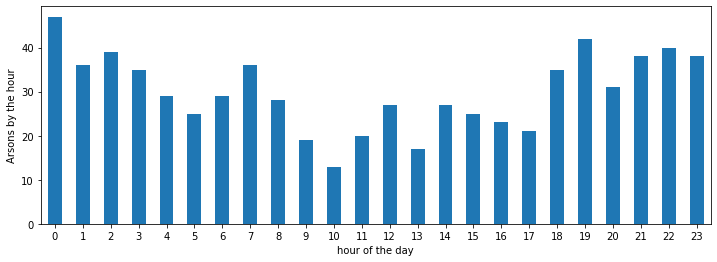

In [11]:
fig, axs = plt.subplots(figsize=(12, 4))
arson.groupby(arson['date'].dt.hour)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('hour of the day');
plt.ylabel('Arsons by the hour')

Text(0.5, 1.0, 'Arsons by Month')

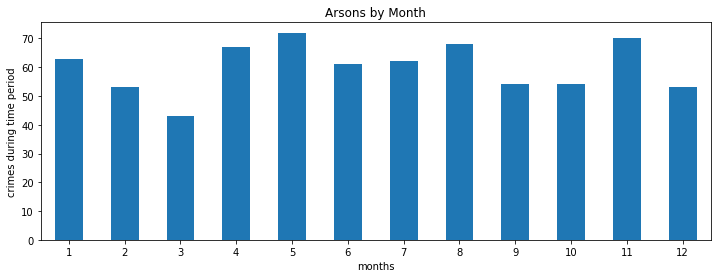

In [12]:
fig, axs = plt.subplots(figsize=(12, 4))
arson.groupby(arson['date'].dt.month)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Arsons by Month')

In [13]:
#apparently March is a low point for arsons

Text(0.5, 1.0, 'Arsons by year')

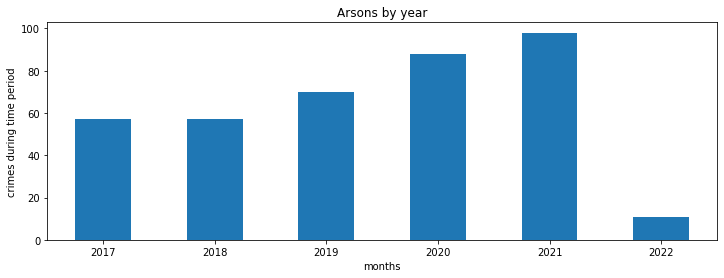

In [14]:
fig, axs = plt.subplots(figsize=(12, 4))
murder.groupby(murder['date'].dt.year)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Arsons by year')

#### EDA
lets make a pre-covid and post covid dataset

In [15]:
pre_df = df[df.date < '2020-03-01']
post_df = df[df.date >= '2020-03-01']



Text(0.5, 1.0, 'crimes by month')

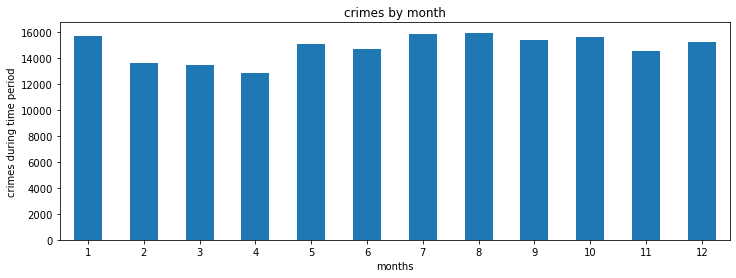

In [16]:
fig, axs = plt.subplots(figsize=(12, 4))
post_df.groupby(post_df['date'].dt.month)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('crimes by month')

In [17]:
post_df.head()

,crime_type,crime_category,date,reported,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count
0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 20:36:00,-105.018825,39.714268,Valverde,2022-01-04,11:30:00,1.6,3941.0,1
1,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,2022-01-03 21:12:00,-105.014892,39.711518,Valverde,2022-01-03,19:47:00,1.6,3941.0,1
2,drug-opium-or-deriv-sell,drug-alcohol,2022-01-05 12:10:00,2022-01-05 15:01:00,-105.024456,39.718448,Valverde,2022-01-05,12:10:00,1.6,3941.0,1
3,drug-opium-or-deriv-possess,drug-alcohol,2022-01-05 12:10:00,2022-01-05 15:01:00,-105.024456,39.718448,Valverde,2022-01-05,12:10:00,1.6,3941.0,1
4,theft-of-motor-vehicle,auto-theft,2022-01-05 04:00:00,2022-01-05 11:08:00,-105.012233,39.711452,Valverde,2022-01-05,04:00:00,1.6,3941.0,1


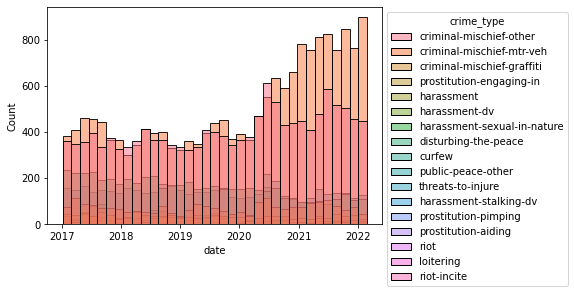

In [18]:
_ = sns.histplot(x='date',hue='crime_type',data=public_disorder)
sns.move_legend(_, "upper left", bbox_to_anchor=(1, 1))


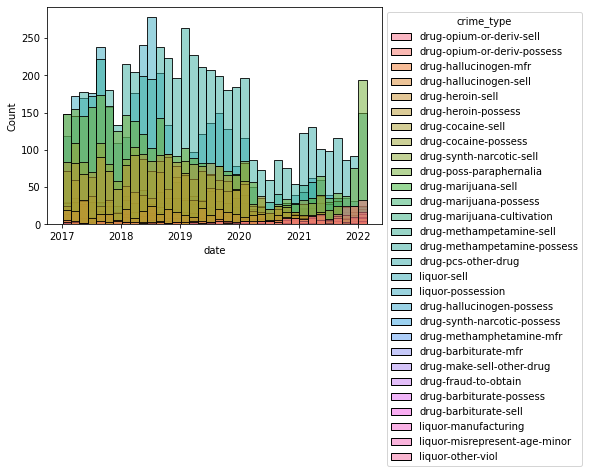

,y_lon,x_lat,equity_score,pop_2010,crime_count
date,,,,,
2017-12-31,-594979.665705,225226.108464,15645.199937,52418059.0,5668
2018-12-31,-643789.188442,243689.737044,16924.999924,57628806.0,6134
2019-12-31,-529376.907967,200378.344234,14145.399945,46300718.0,5043
2020-12-31,-270289.802482,102318.619832,7152.199959,23159594.0,2575
2021-12-31,-275326.633341,104238.536651,7817.599922,22286425.0,2623
2022-12-31,-61626.459303,23330.717619,2079.799933,3845234.0,587


In [19]:
_ = sns.histplot(x='date',hue='crime_type',data=drug_alcohol)
sns.move_legend(_, "upper left", bbox_to_anchor=(1, 1))
plt.show()
drug_alcohol.crime_type.value_counts()
drug_alcohol.resample('Y', on='date').sum()


public_disorder


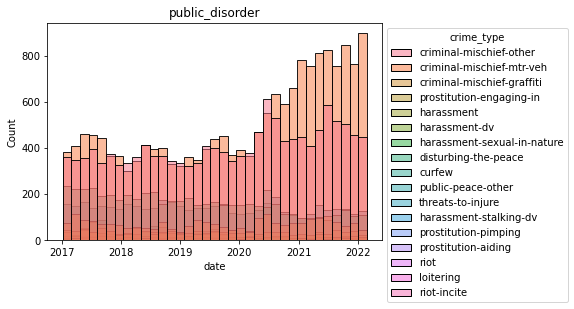

                   y_lon          x_lat  equity_score     pop_2010  \
date                                                                 
2017-12-31 -9.782784e+05  370296.303814  26586.099820   90393170.0   
2018-12-31 -9.006851e+05  340943.402677  24455.699842   83558054.0   
2019-12-31 -8.866105e+05  335625.389218  24287.599853   82849279.0   
2020-12-31 -1.051809e+06  398160.668410  28975.799805   98992994.0   
2021-12-31 -1.201111e+06  454695.690795  33749.899755  111588155.0   
2022-12-31 -1.891209e+05   71594.472506   5406.199958   17661027.0   

            crime_count  
date                     
2017-12-31         9320  
2018-12-31         8584  
2019-12-31         8448  
2020-12-31        10021  
2021-12-31        11444  
2022-12-31         1802  
drug_alcohol


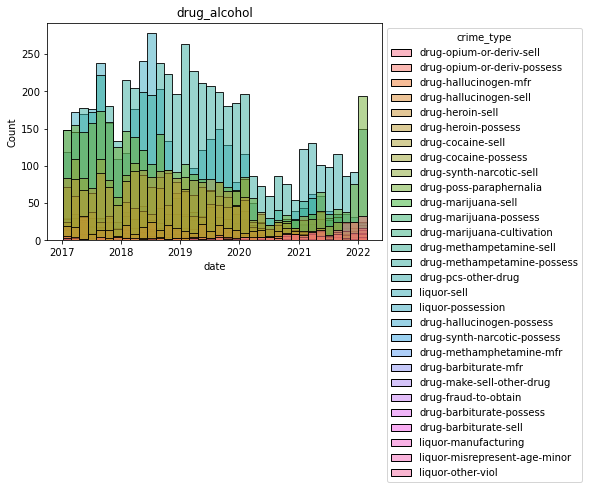

                    y_lon          x_lat  equity_score    pop_2010  \
date                                                                 
2017-12-31 -594979.665705  225226.108464  15645.199937  52418059.0   
2018-12-31 -643789.188442  243689.737044  16924.999924  57628806.0   
2019-12-31 -529376.907967  200378.344234  14145.399945  46300718.0   
2020-12-31 -270289.802482  102318.619832   7152.199959  23159594.0   
2021-12-31 -275326.633341  104238.536651   7817.599922  22286425.0   
2022-12-31  -61626.459303   23330.717619   2079.799933   3845234.0   

            crime_count  
date                     
2017-12-31         5668  
2018-12-31         6134  
2019-12-31         5043  
2020-12-31         2575  
2021-12-31         2623  
2022-12-31          587  
all_other_crimes


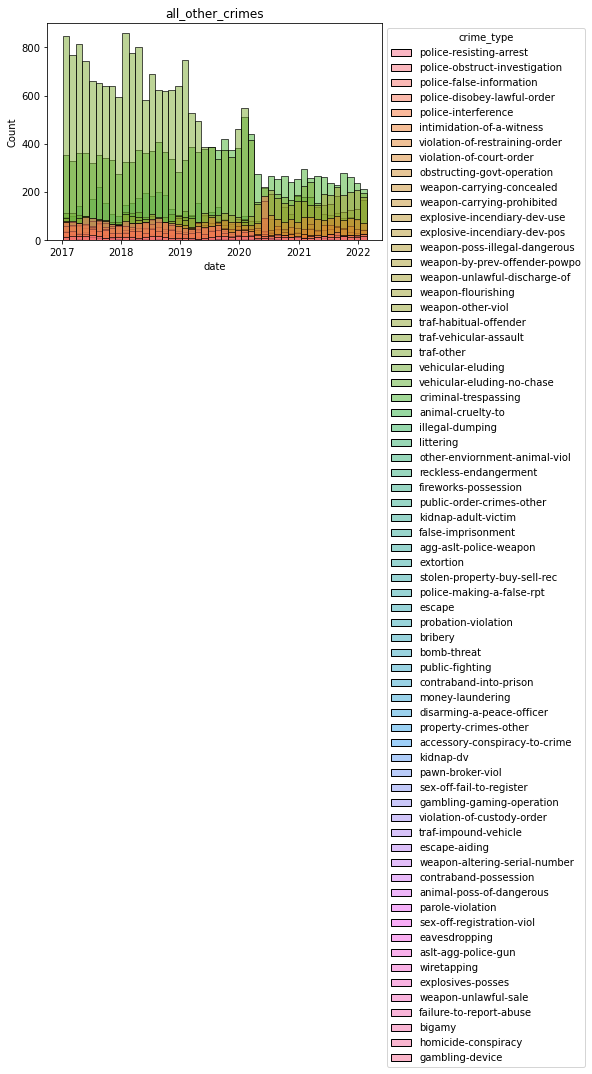

                   y_lon          x_lat  equity_score     pop_2010  \
date                                                                 
2017-12-31 -1.803329e+06  682701.581704  47390.999604  161542639.0   
2018-12-31 -1.849455e+06  700190.481020  49234.999545  172109523.0   
2019-12-31 -1.536251e+06  581624.777560  41735.799684  136776803.0   
2020-12-31 -1.285260e+06  486606.071601  34503.599685  117468827.0   
2021-12-31 -1.160027e+06  439201.912950  31356.199672  103189798.0   
2022-12-31 -1.751741e+05   66325.928218   4697.499937   15741598.0   

            crime_count  
date                     
2017-12-31        17183  
2018-12-31        17623  
2019-12-31        14640  
2020-12-31        12245  
2021-12-31        11053  
2022-12-31         1669  
traffic_accident


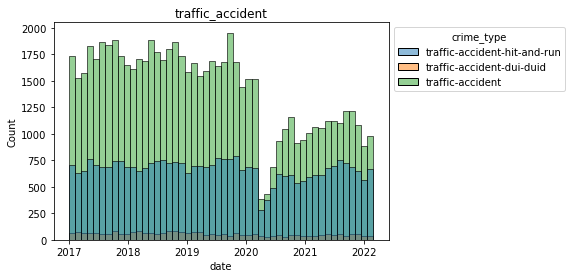

                   y_lon          x_lat  equity_score     pop_2010  \
date                                                                 
2017-12-31 -2.540774e+06  961789.111553  72424.599352  218638609.0   
2018-12-31 -2.543037e+06  962674.226836  72759.899324  221451444.0   
2019-12-31 -2.471721e+06  935705.302678  70726.499303  218237936.0   
2020-12-31 -1.564519e+06  592235.455989  43728.399594  141390702.0   
2021-12-31 -1.823246e+06  690199.857977  51061.999520  163026545.0   
2022-12-31 -2.612420e+05   98894.414443   7342.699926   23529536.0   

            crime_count  
date                     
2017-12-31        24211  
2018-12-31        24281  
2019-12-31        23587  
2020-12-31        14907  
2021-12-31        17371  
2022-12-31         2489  
robbery


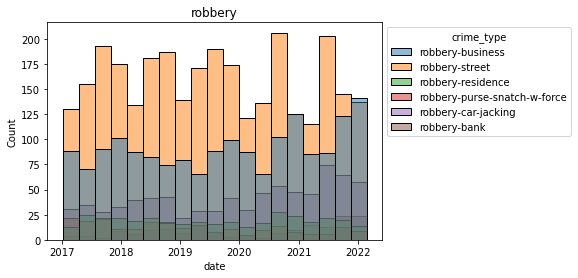

                    y_lon         x_lat  equity_score    pop_2010  crime_count
date                                                                          
2017-12-31 -125218.737765  47401.284860   3364.199977  11854960.0         1194
2018-12-31 -126692.684309  47955.669764   3370.199977  12089605.0         1207
2019-12-31 -124590.118832  47164.089627   3389.799981  12158328.0         1189
2020-12-31 -126271.048726  47798.693236   3472.799966  11318289.0         1203
2021-12-31 -136449.528806  51653.554368   3737.599970  12728473.0         1300
2022-12-31  -24561.378296   9297.399675    682.299995   2322842.0          234
other_crimes_against_persons


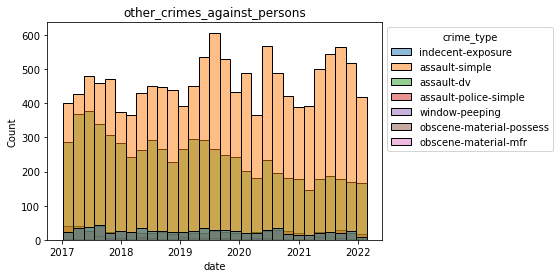

                    y_lon          x_lat  equity_score    pop_2010  \
date                                                                 
2017-12-31 -496693.451621  188011.119228  13493.499906  46180542.0   
2018-12-31 -430450.956863  162949.693995  11638.499927  40837565.0   
2019-12-31 -486923.938096  184331.031184  13419.299914  45299362.0   
2020-12-31 -418687.345895  158499.243758  11293.899918  39137081.0   
2021-12-31 -416809.073551  157783.372198  11344.999909  37789670.0   
2022-12-31  -58882.685082   22290.478625   1640.599988   5432994.0   

            crime_count  
date                     
2017-12-31         4732  
2018-12-31         4102  
2019-12-31         4641  
2020-12-31         3989  
2021-12-31         3971  
2022-12-31          561  
aggravated_assault


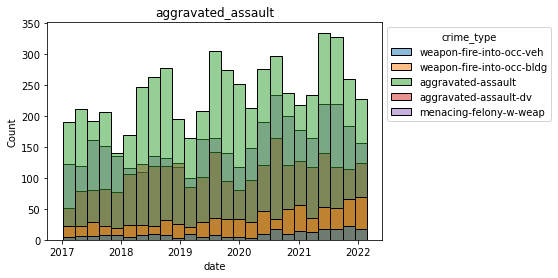

                    y_lon          x_lat  equity_score    pop_2010  \
date                                                                 
2017-12-31 -218646.877094   82767.381199   5634.799967  20826545.0   
2018-12-31 -255483.883049   96711.295273   6589.899958  24974411.0   
2019-12-31 -263459.190366   99733.994405   6840.499965  26714786.0   
2020-12-31 -310046.897810  117376.431668   8058.699952  30988859.0   
2021-12-31 -337652.001760  127825.797417   8880.299941  32956485.0   
2022-12-31  -47230.803214   17880.341607   1238.999989   4814207.0   

            crime_count  
date                     
2017-12-31         2083  
2018-12-31         2437  
2019-12-31         2511  
2020-12-31         2954  
2021-12-31         3217  
2022-12-31          450  
arson


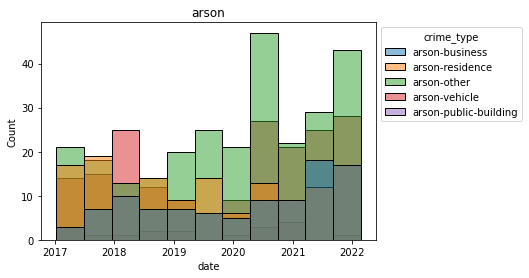

                   y_lon        x_lat  equity_score   pop_2010  crime_count
date                                                                       
2017-12-31 -13121.415406  4966.023822    310.799999  1292537.0          125
2018-12-31 -12071.363833  4569.604094    292.499998  1078994.0          115
2019-12-31 -10601.489960  4012.843336    270.999999  1009936.0          101
2020-12-31 -16795.828112  6357.049423    437.699999  1462371.0          160
2021-12-31 -19629.485470  7430.447444    520.099996  1637406.0          187
2022-12-31  -3358.538382  1271.573118     91.699999   284154.0           32
burglary


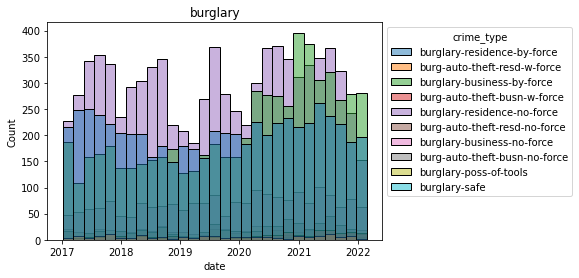

                    y_lon          x_lat  equity_score    pop_2010  \
date                                                                 
2017-12-31 -465197.819472  176056.845467  13349.799893  41488307.0   
2018-12-31 -430774.402852  163042.325156  12265.399908  39144465.0   
2019-12-31 -423101.886173  160151.731262  12112.599915  38043928.0   
2020-12-31 -555797.075109  210369.135657  15850.299880  48200075.0   
2021-12-31 -599852.891806  227058.211329  17028.599863  53207555.0   
2022-12-31  -69589.780302   26340.327433   1933.999983   6382763.0   

            crime_count  
date                     
2017-12-31         4433  
2018-12-31         4105  
2019-12-31         4032  
2020-12-31         5296  
2021-12-31         5715  
2022-12-31          663  
larceny


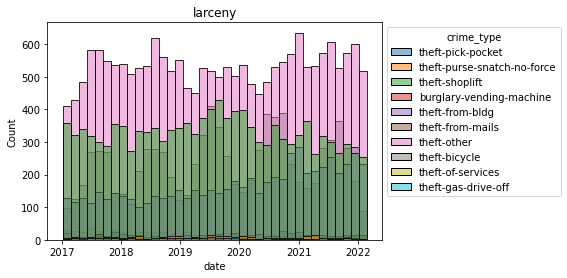

                   y_lon          x_lat  equity_score    pop_2010  crime_count
date                                                                          
2017-12-31 -9.363526e+05  354483.745069  28138.299765  78136527.0         8923
2018-12-31 -9.694945e+05  367044.717855  29300.599736  80378758.0         9237
2019-12-31 -1.032486e+06  390890.212613  31565.899673  84143547.0         9837
2020-12-31 -1.059038e+06  400924.118109  31774.899708  89518963.0        10093
2021-12-31 -1.067271e+06  404089.627280  32263.599702  89113087.0        10169
2022-12-31 -1.393717e+05   52774.984093   4174.099959  11622074.0         1328
theft_from_car


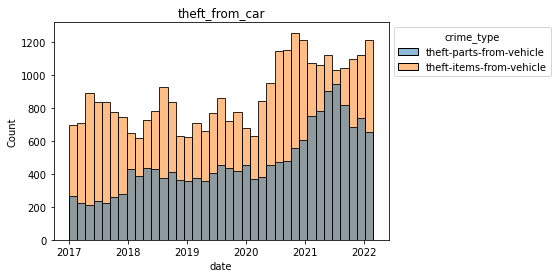

                   y_lon          x_lat  equity_score     pop_2010  \
date                                                                 
2017-12-31 -7.689522e+05  291024.588073  21599.199832   72062858.0   
2018-12-31 -8.543814e+05  323348.448470  24138.199818   80168256.0   
2019-12-31 -8.535102e+05  323054.627456  24225.599840   79781302.0   
2020-12-31 -1.104492e+06  418043.292785  31578.999790  101868778.0   
2021-12-31 -1.421498e+06  538101.786942  41056.999671  130242456.0   
2022-12-31 -2.196709e+05   83155.476089   6372.199951   20310856.0   

            crime_count  
date                     
2017-12-31         7326  
2018-12-31         8140  
2019-12-31         8132  
2020-12-31        10524  
2021-12-31        13545  
2022-12-31         2093  
auto_theft


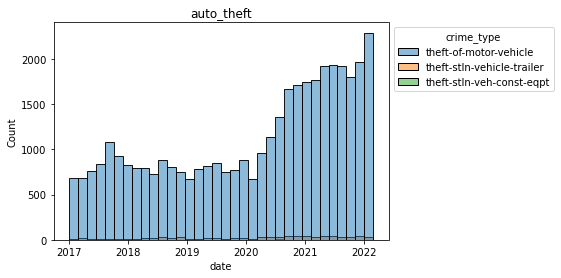

                   y_lon          x_lat  equity_score     pop_2010  \
date                                                                 
2017-12-31 -5.807221e+05  219813.781167  15511.699867   56183393.0   
2018-12-31 -5.627471e+05  213041.493688  14930.899871   53561361.0   
2019-12-31 -5.626111e+05  213008.804983  15313.299879   55032624.0   
2020-12-31 -8.980009e+05  339962.271676  24628.299794   89081365.0   
2021-12-31 -1.325173e+06  501755.791026  36667.199673  130260767.0   
2022-12-31 -2.527917e+05   95717.434709   6982.299936   24362693.0   

            crime_count  
date                     
2017-12-31         5534  
2018-12-31         5364  
2019-12-31         5361  
2020-12-31         8557  
2021-12-31        12629  
2022-12-31         2409  
white_collar_crime


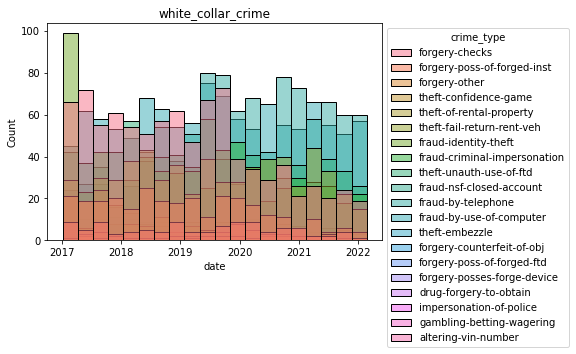

                    y_lon         x_lat  equity_score    pop_2010  crime_count
date                                                                          
2017-12-31 -131804.781955  49906.899795   3775.399967  11463031.0         1256
2018-12-31 -136094.491981  51540.097922   3945.999960  11313939.0         1297
2019-12-31 -141659.371705  53642.916330   4107.499962  12413891.0         1350
2020-12-31 -122870.326364  46531.559790   3442.399971  11284735.0         1171
2021-12-31 -106296.904590  40248.809668   3028.899972   9453270.0         1013
2022-12-31  -13642.129482   5164.877175    419.199996   1189811.0          130
murder


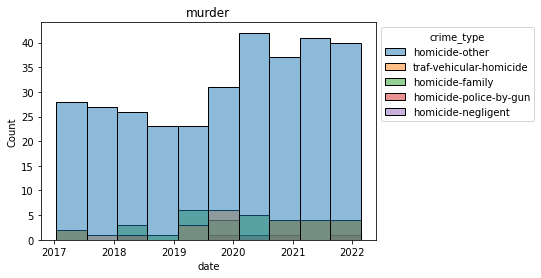

                   y_lon        x_lat  equity_score   pop_2010  crime_count
date                                                                       
2017-12-31  -5982.740381  2264.749533    159.499999   561558.0           57
2018-12-31  -5877.377404  2225.374543    150.099999   619632.0           57
2019-12-31  -7347.118644  2781.587016    179.199999   692777.0           70
2020-12-31  -9235.439576  3496.711415    227.799998  1017161.0           88
2021-12-31 -10284.250866  3893.958646    264.399998  1074340.0           98
2022-12-31  -1154.764296   437.049234     32.099999   125033.0           11


In [20]:
for i,x in enumerate(subsets):
    print(list_of_subsets[i])
    _ = sns.histplot(x='date',hue='crime_type',data=x)
    _.set(title=list_of_subsets[i])
    sns.move_legend(_, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    x.crime_type.value_counts()
    print(x.resample('Y', on='date').sum())
